# Introduction.

Let's play a game, we are going to pick the students that are late today as volunteers. I want to know who has the best accuracy at trhowing a coin, so we are going to make this students throw the coin and compare their performance.

By now we have an ordered list based on accuracy. What have we measured with our experiment?

    a)We measure hability and so the first student has supperior skills and will always perform better.
    b)We need more experiments, as one or few measurements cannot determine habilities. (Regression to the mean).
    
Let's repeat the experiment and see our team performance.

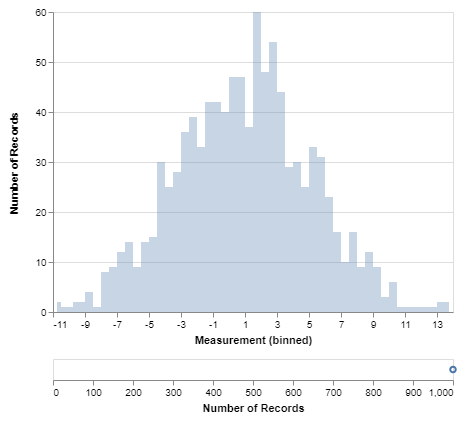

In [75]:
import pandas as pd
import altair as alt
import numpy as np
#np.random.seed(42)

# Generating Data
source = pd.DataFrame({'Trial': np.random.normal(1, 4, 1000)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skills',
    value_name='Measurement'
)
interval = alt.selection_interval(encodings=['x'])

ats = alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step',
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
   ).add_selection(
    interval
)

hist = alt.Chart(source).mark_point().encode(
alt.X('count()', scale=alt.Scale(domain=[0,1000]))).transform_filter(interval)

ats & hist

    Axiom 1: 
    Each player has a skill value, represented by a continuous variable.


Vocabulary: 
    
    The mean is the middle value in a Bell curve (Gaussian distribution).

    The standard deviation measures the shape of the Bell curve.
    
Formally, we will assume the probability distribution is a Gauss distribution with equation $n(x;\mu,\sigma)=\frac{1}{(2\pi)^{1/2} \sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$ where $\mu$ = mean, $\sigma$=  standard deviation.

Regression to the mean is a very tricky topic, in fact, whenever a lawyer needs to explain regression to the mean to the Jury, they know they will end up losing the case.


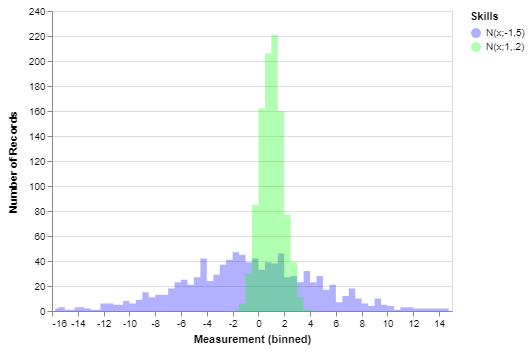

In [89]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({'N(x;1,.2)': np.random.normal(1, .9, 1000),
                   'N(x;-1,5)': np.random.normal(-1, 5, 1000)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skills',
    value_name='Measurement'
)
interval = alt.selection_interval(encodings=['x'])
alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Skills',
        scale=alt.Scale(range=['#0000ff','#00ff00'])
    )
).add_selection(
    interval
)


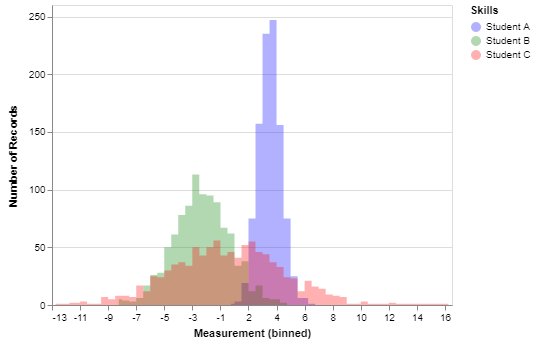

Today we will target this problem of evaluating performance. 

## Xbox

We will work on the  case of Xbox players Jill and Fred.

 To try to determine the skills of players.
 Warning: Perhaps an skilled player is creating a second account, or the player has experience in similar tasks.
 
 Since we know very little about a player before they play any games, this distribution needs to be broad and cover the full range of skills that a new player might have.
 

    Axiom1*. 
    Each player has a skill value, represented by a continuous variable with a broad prior distribution.

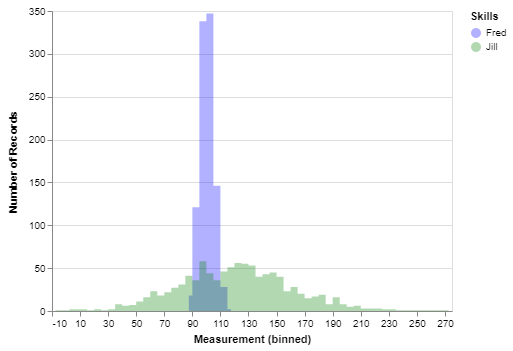

In [92]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({'Jill': np.random.normal(120, 40, 1000),
                   'Fred': np.random.normal(100, 5, 1000)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skills',
    value_name='Measurement'
)
interval = alt.selection_interval(encodings=['x'])
alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Skills',
        scale=alt.Scale(range=['#0000ff', '#008000', '#ff0000'])
    )
).add_selection(
    interval
)

Jill is a relatively new player and so there is a lot of uncertainty in her skill whereas Fred is a more established player whose skill is more precisely known. 

We consider the probability that Jill wins the match. To understand the relationship of our variables lets look at the factor graph:

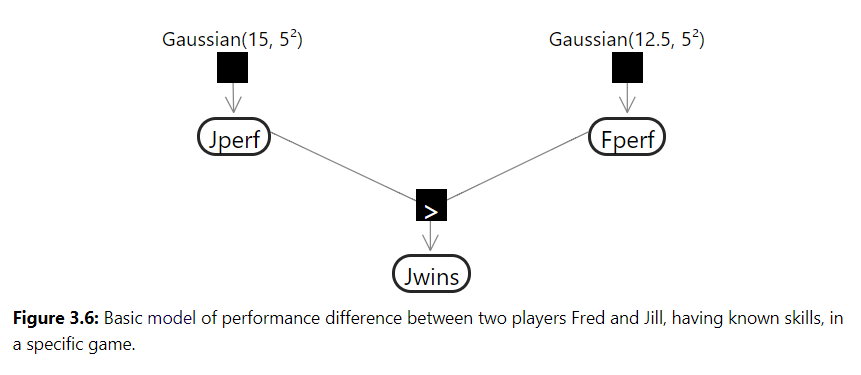

In [90]:
from IPython.display import Image
Image("img/model1.png")


  Once a new player has played a game, we aim to use the outcome of the game to infer the updated skill distribution for the player (and also for any other players in the game). This involves solving a probabilistic inference problem to calculate the posterior distribution of each player’s skill, taking account of the new information provided by the result of the game. 
 

    Axiom 2.
    Each player has a performance value for each game, which varies from game to game such that the average value is equal to the skill of that player. The variation in performance, which is the same for all players, is symmetrically distributed around the mean value and is more likely to be close to the mean than to be far from the mean.

    Axiom 3.
    The player with the highest performance value wins the game.

To consider uncertaintinity we add two more uncertain variables $Jskill$ and $Fskill$:

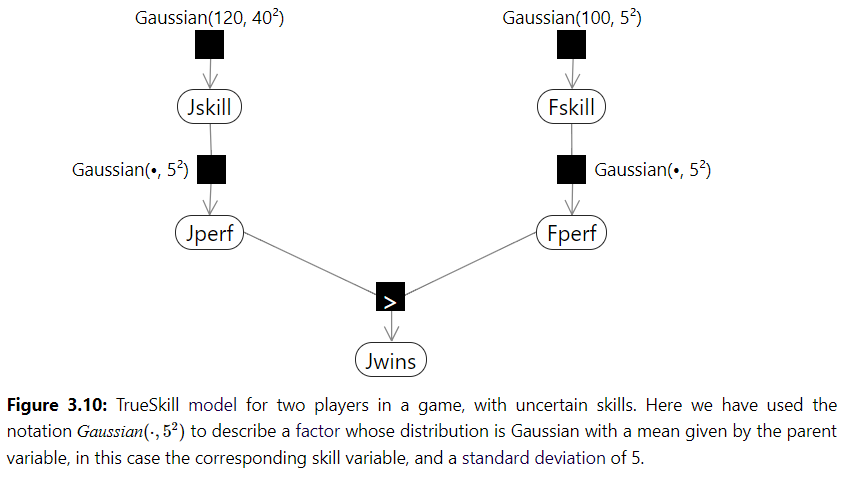

In [93]:
from IPython.display import Image
Image("img/TrueSkill.png")

If you read the book you'll find out that belief propagation is not the best method to use as every time Jill plays we we increase the number of variables on the posterior.

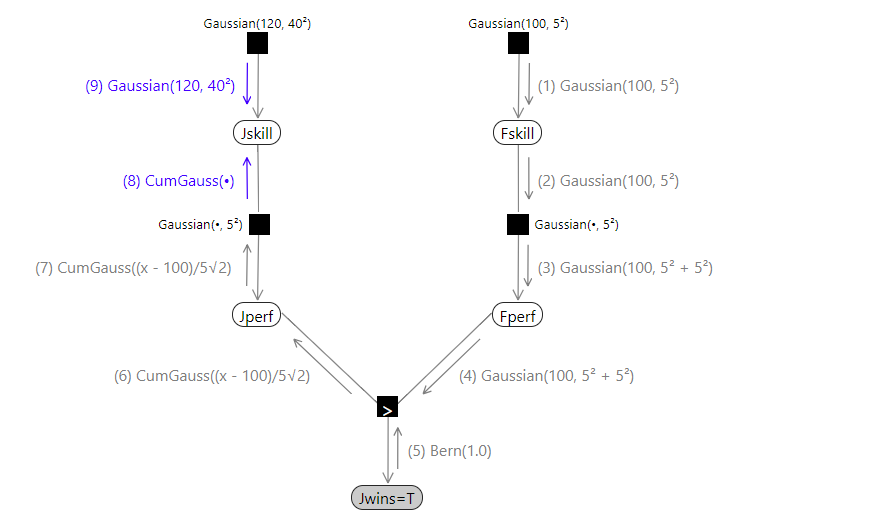

In [94]:
from IPython.display import Image
Image("img/Belief.png")

We use instead expectation propagation.

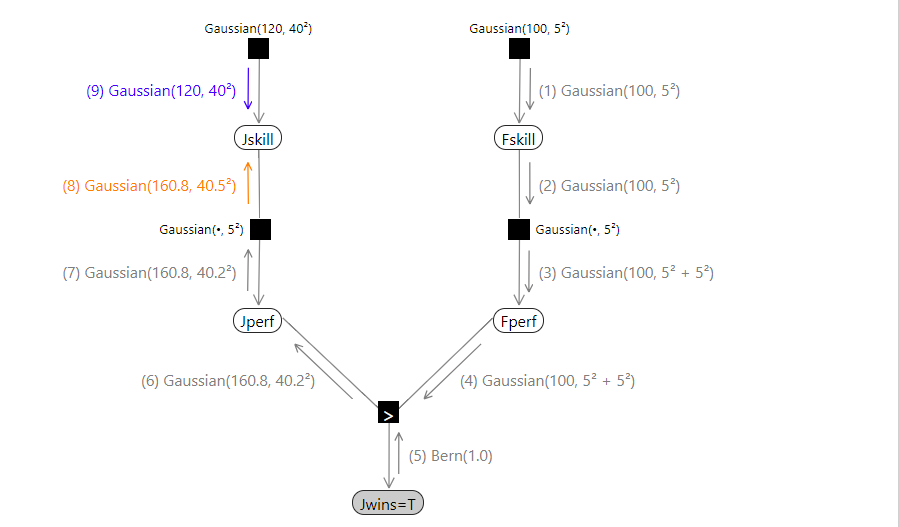

In [95]:
from IPython.display import Image
Image("img/expectation.png")

Let's look at the data that we have:

In [1]:
import pandas
df = pandas.read_csv('Data/TrueSkill_Halo2-HeadToHead_Games[160_to_167].csv')
print(df)

      Player1     Player2  Player1Score  Player2Score  \
0  Gamer00123  Gamer00103             0             2   
1  Gamer00044  Gamer00094             2             4   
2  Gamer00139  Gamer00074             2             5   
3  Gamer00095  Gamer00140             2             2   
4  Gamer00120  Gamer00141             5             1   
5  Gamer00142  Gamer00143             5             2   
6  Gamer00144  Gamer00122             1             1   
7  Gamer00116  Gamer00145             5             0   

                    Players  Scores     Outcome  Draw Proportion      Id  \
0  {Gamer00123, Gamer00103}  {0, 2}  Player2Win                0  282203   
1  {Gamer00044, Gamer00094}  {2, 4}  Player2Win                0  282201   
2  {Gamer00139, Gamer00074}  {2, 5}  Player2Win                0  282205   
3  {Gamer00095, Gamer00140}  {2, 2}        Draw                1  282211   
4  {Gamer00120, Gamer00141}  {5, 1}  Player1Win                0  282209   
5  {Gamer00142, Gamer00143}  {